# The process of learning BFS & DFS

哲學四 05113010 陳鳳庭

## Content

- [BFS與DFS原理與比較](#BFS與DFS原理與比較)
- [程式碼設計](#設計程式碼)
- [Demo](#Demo)
- [參考資料](#參考資料)

----

## BFS與DFS原理與比較

### BFS

Breadth-First Search（廣度優先搜尋）
- 走訪方式採Level-Order Traversal：從起點開始，根據**level由小到大**一層層走訪，直到遍歷完整個graph
> 與起點距離相近的vertex，其走訪順序是相近的

### DFS

Depth-First Search（深度優先搜尋）
- 走訪方式採Pre-Order Traversal：從起點開始，不斷地往前前進，**遇到的就先走訪**，當無路可走或所有相鄰的vertex皆已走訪過，就退回前一個vertex，繼續往前尋找尚未被走訪的vertex，直到遍歷完整個graph
   > 逐個走訪每個路徑

### BFS vs. DFS

| Method | Design | Time Complexity |  Space Complexity |
| --- | --- | --- | --- |
| **BFS** | Queue | O(V+E) | 與**點數個數**成正比 |
| **DFS** | Stack | O(V+E) | 與**遞迴深度**成正比 |

- 時間複雜度：

BFS與DFS相同，因為兩者皆需要遍歷整個graph，所以時間複雜度皆為所有點數個數與所有邊個數相加

- 空間複雜度：BFS與DFS的主要差異

    ○ BFS：像是從一個點向四面八方擴張，通常需要的記憶體個數與點的個數成正比
       →  一般解決最短路徑問題：使用大量的記憶體，來遍歷所有的點，以此找到最佳解
  
    ○ DFS：像是找到一條路徑就走到底，直到不能走為止，就退回上一個點，往其他路繼續走，因此，需要的記憶體個數會與路徑的深度成正比
       → 一般解決連通性問題：使用較少的記憶體，來尋找解，速度較快，但找到的不一定是最佳解

簡單來說，BFS是用空間換取時間，DFS是用時間換取空間

在一般情況下，使用DFS解決的問題BFS皆可以解決，但基於DFS較好實現的原因，通常使用的是DFS

---

## 設計程式碼

先測試一下要使用的套件

In [1]:
from collections import defaultdict

In [2]:
graph = defaultdict(list)

In [193]:
w = defaultdict(list)

In [194]:
w[3].append(2)
print(w[3])

[2]


In [196]:
er = w[3]
er

[2]

In [62]:
a = [2,3,5,3,5,3,5]
not (4 in a)

True

助教測資範例

In [3]:
graph[0].append(1)
graph[0].append(2)
graph[1].append(2)
graph[2].append(0)
graph[2].append(3)
graph[3].append(3)
graph

defaultdict(list, {0: [1, 2], 1: [2], 2: [0, 3], 3: [3]})

### BFS

In [230]:
def BFS(s):
    temp = [s]
    bfs = [s]
    queue = []
    
   
    value = graph[s]
    for i in value:
        if not (i in temp):
            queue.append(i)
            temp.append(i)
    
    while queue:
        value = graph[queue[0]]
        for i in value:
            if not (i in temp):
                queue.append(i)
                temp.append(i)
        
        bfs.append(queue.pop(0))
        
    return bfs

In [215]:
BFS(2)

[2, 0, 3, 1]

測試

In [106]:
k = [3,42]
b = []
b.append(k.pop(0))
print(b, k)

[3] [42]


In [97]:
q = [3]
if q:
    print(1)

1


In [237]:
test = [4]
t = [3,2,4,1,3,4]
s = []

for i in t:
    if not (i in test):
        test.append(i)
        s.append(i)

print(s)
print(test)

[3, 2, 1]
[4, 3, 2, 1]


In [153]:
e = t
if e:
    e.pop()
e

[]

### DFS

In [238]:
# ❌，先push再pop
def DFS(s):
    temp = [s]
    dfs = [s]
    stack = []
    
    value = graph[s]
    for i in value:
        if not (i in temp):
            stack.append(i)
            temp.append(i)
    
    while stack:
        value = graph[stack[len(stack)-1]]
        for i in value:
            if not (i in temp):
                stack.append(i)
                temp.append(i)
                    
        dfs.append(stack.pop())
        
    return dfs

In [239]:
DFS(2)

[2, 3, 1, 0]

❌，第一次測試回傳值不如預期，因為在stack中pop是直接從最後一個取（最新進入的），所以必須先pop在進行push，調整一下

In [270]:
def DFS(s):
    temp = [s]
    dfs = [s]
    stack = []
    
    value = graph[s]
    for i in value:
        if not (i in temp):
            stack.append(i)
            temp.append(i)
    
    while stack:
        tempp = stack.pop()
        dfs.append(tempp)
        
        value = graph[tempp]
        for i in value:
            if not (i in temp):
                stack.append(i)
                temp.append(i)
            
    return dfs

In [225]:
DFS(1)

[1, 2, 3, 0]

測試

In [217]:
o = [3,4,2,1]
len(o)-1

3

### 範例測試

帶課堂上其他例題來測試看看

In [246]:
test = defaultdict(list)

In [247]:
test[11].append(10)
test[10].append(11)
test[10].append(9)
test[10].append(6)
test[9].append(4)
test[9].append(7)
test[9].append(10)
test[6].append(10)
test[6].append(8)
test[7].append(9)
test[7].append(4)
test[7].append(2)
test[7].append(5)
test[7].append(8)
test[8].append(7)
test[8].append(5)
test[8].append(2)
test[5].append(8)
test[5].append(7)
test[5].append(2)
test[5].append(3)
test[5].append(12)
test[2].append(3)
test[2].append(5)
test[2].append(7)
test[2].append(4)
test[2].append(12)
test[2].append(8)
test[4].append(1)
test[4].append(2)
test[4].append(7)
test[4].append(9)
test[3].append(1)
test[3].append(2)
test[3].append(5)
test[3].append(12)
test[1].append(3)
test[1].append(4)
test[12].append(3)
test[12].append(2)
test[12].append(5)

In [248]:
def BFS1(s):
    temp = [s]
    bfs = [s]
    queue = []
    
   
    value = test[s]
    for i in value:
        if not (i in temp):
            queue.append(i)
            temp.append(i)
    
    while queue:
        value = test[queue[0]]
        for i in value:
            if not (i in temp):
                queue.append(i)
                temp.append(i)
        
        bfs.append(queue.pop(0))
        
    return bfs

In [234]:
BFS1(11)

[11, 10, 9, 6, 4, 7, 8, 1, 2, 5, 3, 12]

In [257]:
def DFS1(s):
    temp = [s]
    dfs = [s]
    stack = []
    
    value = test[s]
    for i in value:
        if not (i in temp):
            stack.append(i)
            temp.append(i)
    
    while stack:
        tempp = stack.pop()
        dfs.append(tempp)
        
        value = test[tempp]
        for i in value:
            if not (i in temp):
                stack.append(i)
                temp.append(i)
            
    return dfs

In [236]:
DFS1(11)

[11, 10, 6, 8, 2, 12, 4, 1, 3, 5, 7, 9]

測試成功，嘗試將重複的程式碼包成套件

In [264]:
def _key_value(key, method, temp):
    value = graph[key]
    
    for i in value:
        if not (i in temp):
            method.append(i)
            temp.append(i)
    
    return method, temp

In [265]:
def BFS2(s):
    temp = [s]
    bfs = [s]
    queue = []
    
    queue, temp = _key_value(s, queue, temp)

    while queue:
        queue, temp = _key_value(queue[0], queue, temp)
        
        bfs.append(queue.pop(0))
        
    return bfs

In [273]:
BFS(1)

[1, 2, 0, 3]

In [253]:
BFS2(11)

[11, 10, 9, 6, 4, 7, 8, 1, 2, 5, 3, 12]

In [266]:
def DFS2(s):
    temp = [s]
    dfs = [s]
    stack = []
    
    stack, temp = _key_value(s, stack, temp)
   
    while stack:
        tempp = stack.pop()
        dfs.append(tempp)
        
        stack, temp = _key_value(tempp, stack, temp)
            
    return dfs

In [272]:
DFS(1)

[1, 2, 3, 0]

In [258]:
DFS1(11)

[11, 10, 6, 8, 2, 12, 4, 1, 3, 5, 7, 9]

In [268]:
DFS2(2)

[2, 3, 0, 1]

---

## Demo

- BFS

![](https://github.com/vanikk06/Data-structures-and-Algorithms/blob/master/week_13/image/Webp.net-gifmaker.gif)

Queue中灰色部分，表示當次提取的值

- DFS

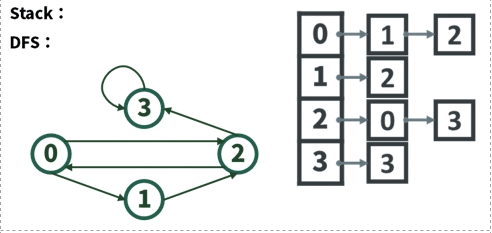

In [280]:
Image(filename="ifmaker1.gif", width=400, height=500)

Stack中灰色部分，表示當次提取的值

---

## 參考資料

- [課堂PPT_BFS](https://docs.google.com/presentation/d/e/2PACX-1vSYJYXUXvGAeTZ5fknxj_-EPm3zxgy4ITdImrXzy63Y-iZgs8uwVNmOaZlnx9fUNzsbo8kphvMTa0c4/pub?start=false&loop=false&delayms=3000&slide=id.p)
- [課堂PPT_DFS](https://docs.google.com/presentation/d/e/2PACX-1vTma_vOZyE70O23KWw4I4Y78aAaT5fJSTq7Mae912kCwka_u5ZMWPoo14D86-x-57kZPbb6hAGktSW4/pub?start=false&loop=false&delayms=3000&slide=id.p)
- [個人github筆記](https://github.com/vanikk06/Data-structures-and-Algorithms)
    - [Breadth-First Search](https://github.com/vanikk06/Data-structures-and-Algorithms/tree/master/week_12#breadth-first-search)
    - [Depth-First Search](https://github.com/vanikk06/Data-structures-and-Algorithms/blob/master/week_13/README.md#depth-first-search)
    - [BFS vs. DFS](https://github.com/vanikk06/Data-structures-and-Algorithms/blob/master/week_13/README.md#bfs-vs-dfs)